In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

import json
import os

# Specify the path to your Kaggle API credentials JSON file
kaggle_json_path = '/content/kaggle.json'

# Check if the JSON file exists
if os.path.exists(kaggle_json_path):
    with open(kaggle_json_path, 'r') as json_file:
        kaggle_credentials = json.load(json_file)

    # Extract username and key from the JSON file
    kaggle_username = kaggle_credentials['username']
    kaggle_key = kaggle_credentials['key']

    # Set Kaggle API credentials as environment variables
    os.environ['KAGGLE_USERNAME'] = kaggle_username
    os.environ['KAGGLE_KEY'] = kaggle_key
else:
    print("Kaggle API credentials JSON file not found.")


import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
!kaggle datasets download -d obulisainaren/multi-cancer -p '/content/'

import zipfile

with zipfile.ZipFile('/content/multi-cancer.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

Mounted at /content/drive
100% 8.61G/8.62G [01:47<00:00, 133MB/s] 
100% 8.62G/8.62G [01:47<00:00, 85.7MB/s]


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
# import pandas as pd
from tensorflow.keras.layers import LSTM, SimpleRNN, Concatenate,Reshape
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16, Xception
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, LearningRateScheduler, EarlyStopping


In [ ]:
allbening=[]
all_early=[]
all_pre=[]
all_pro=[]
for i in os.listdir('/content/Multi Cancer/ALL'):
    All=os.path.join('/content/Multi Cancer/ALL',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='all_pro':
            #print(image_path)
            all_pro.append({'image_path':image_path,'sub_class':'all_pro','main_class':'All'})
        elif i=='all_early':
            #print(image_path)
            all_early.append({'image_path':image_path,'sub_class':'all_early','main_class':'All'})
        elif i=='all_pre':
            #print(image_path)
            all_pre.append({'image_path':image_path,'sub_class':'all_pre','main_class':'All'})
        elif i=='all_benign':
            #print(image_path)
            allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'All'})


df1=pd.DataFrame(allbening)
df2=pd.DataFrame(all_early)
df3=pd.DataFrame(all_pre)
df4=pd.DataFrame(all_pro)
all_bening_df=pd.concat([df1, df2,df3,df4])



BrainGlioma=[]
BrainMenin=[]
BrainTumor=[]
for i in os.listdir('/content/Multi Cancer/Brain Cancer'):
    All=os.path.join('/content/Multi Cancer/Brain Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='brain_glioma':
            #print(image_path)
            BrainGlioma.append({'image_path':image_path,'sub_class':'brain_glioma','main_class':'BrainCancer'})
        elif i=='brain_menin':
            #print(image_path)
            BrainMenin.append({'image_path':image_path,'sub_class':'brain_menin','main_class':'BrainCancer'})
        elif i=='brain_tumor':
            #print(image_path)
            BrainTumor.append({'image_path':image_path,'sub_class':'brain_tumor','main_class':'BrainCancer'})
#         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})


df21=pd.DataFrame(BrainGlioma)
df22=pd.DataFrame(BrainMenin)
df23=pd.DataFrame(BrainTumor)
BrainCancerDf=pd.concat([df21, df22,df23])



BreastBenign=[]
BreastMalignant=[]

for i in os.listdir('/content/Multi Cancer/Breast Cancer'):
    All=os.path.join('/content/Multi Cancer/Breast Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='breast_benign':
            #print(image_path)
            BreastBenign.append({'image_path':image_path,'sub_class':'BreastBenign','main_class':'BreastCancer'})
        elif i=='breast_malignant':
            #print(image_path)
            BreastMalignant.append({'image_path':image_path,'sub_class':'BreastMalignant','main_class':'BreastCancer'})
#         elif i=='brain_tumor':
#             #print(image_path)
#             BrainTumor.append({'image_path':image_path,'sub_class':'brain_tumor','main_class':'BrainCancer'})
# #         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})

df31=pd.DataFrame(BreastBenign)
df32=pd.DataFrame(BreastMalignant)

BreastCancerDf=pd.concat([df31, df32])


cervix_dyk=[]
cervix_koc=[]
cervix_mep=[]
cervix_pab=[]
cervix_sfi=[]

for i in os.listdir('/content/Multi Cancer/Cervical Cancer'):
    All=os.path.join('/content/Multi Cancer/Cervical Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='cervix_dyk':
            #print(image_path)
            cervix_dyk.append({'image_path':image_path,'sub_class':'cervix_dyk','main_class':'CervicalCancer'})
        elif i=='cervix_koc':
            #print(image_path)
            cervix_koc.append({'image_path':image_path,'sub_class':'cervix_koc','main_class':'CervicalCancer'})
        elif i=='cervix_mep':
            #print(image_path)
            cervix_mep.append({'image_path':image_path,'sub_class':'cervix_mep','main_class':'CervicalCancer'})
        elif i=='cervix_pab':
            #print(image_path)
            cervix_pab.append({'image_path':image_path,'sub_class':'cervix_pab','main_class':'CervicalCancer'})

        elif i=='cervix_sfi':
            #print(image_path)
            cervix_sfi.append({'image_path':image_path,'sub_class':'cervix_sfi','main_class':'CervicalCancer'})



#         elif i=='brain_tumor':
#             #print(image_path)
#             BrainTumor.append({'image_path':image_path,'sub_class':'brain_tumor','main_class':'BrainCancer'})
# #         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})

df41=pd.DataFrame(cervix_dyk)
df42=pd.DataFrame(cervix_koc)
df43=pd.DataFrame(cervix_mep)
df44=pd.DataFrame(cervix_pab)
df45=pd.DataFrame(cervix_sfi)
CervicalCancer=pd.concat([df41, df42,df43,df44,df45])


kidney_normal=[]
kidney_tumor=[]

for i in os.listdir('/content/Multi Cancer/Kidney Cancer'):
    All=os.path.join('/content/Multi Cancer/Kidney Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='kidney_normal':
            #print(image_path)
            kidney_normal.append({'image_path':image_path,'sub_class':'kidney_normal','main_class':'KidneyCancer'})
        elif i=='kidney_tumor':
            #print(image_path)
            kidney_tumor.append({'image_path':image_path,'sub_class':'kidney_tumor','main_class':'KidneyCancer'})
#         elif i=='brain_tumor':
#             #print(image_path)
#             BrainTumor.append({'image_path':image_path,'sub_class':'brain_tumor','main_class':'BrainCancer'})
# #         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})

df51=pd.DataFrame(kidney_normal)
df52=pd.DataFrame(kidney_tumor)

KidneyCancer=pd.concat([df51, df52])


colon_aca=[]
colon_bnt=[]
lung_aca=[]
lung_bnt=[]
lung_scc=[]

for i in os.listdir('/content/Multi Cancer/Lung and Colon Cancer'):
    All=os.path.join('/content/Multi Cancer/Lung and Colon Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='colon_aca':
            #print(image_path)
            colon_aca.append({'image_path':image_path,'sub_class':'colon_aca','main_class':'ColonCancer'})
        elif i=='colon_bnt':
            #print(image_path)
            colon_bnt.append({'image_path':image_path,'sub_class':'colon_bnt','main_class':'ColonCancer'})
        elif i=='lung_aca':
            #print(image_path)
            lung_aca.append({'image_path':image_path,'sub_class':'lung_aca','main_class':'ColonCancer'})
        elif i=='lung_bnt':
            #print(image_path)
            lung_bnt.append({'image_path':image_path,'sub_class':'lung_bnt','main_class':'ColonCancer'})

        elif i=='lung_scc':
            #print(image_path)
            lung_scc.append({'image_path':image_path,'sub_class':'lung_scc','main_class':'ColonCancer'})



#         elif i=='brain_tumor':
#             #print(image_path)
#             BrainTumor.append({'image_path':image_path,'sub_class':'brain_tumor','main_class':'BrainCancer'})
# #         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})

df61=pd.DataFrame(colon_aca)
df62=pd.DataFrame(colon_bnt)
df63=pd.DataFrame(lung_aca)
df64=pd.DataFrame(lung_bnt)
df65=pd.DataFrame(lung_scc)
ColonCancer=pd.concat([df61, df62,df63,df64,df65])


lymph_cll=[]
lymph_fl=[]
lymp_mcl=[]
for i in os.listdir('/content/Multi Cancer/Lymphoma'):
    All=os.path.join('/content/Multi Cancer/Lymphoma',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='lymph_cll':
            #print(image_path)
            lymph_cll.append({'image_path':image_path,'sub_class':'lymph_cll','main_class':'Lymphoma'})
        elif i=='lymph_fl':
            #print(image_path)
            lymph_fl.append({'image_path':image_path,'sub_class':'lymph_fl','main_class':'Lymphoma'})
        elif i=='lymph_mcl':
            #print(image_path)
            #print(i)
            lymp_mcl.append({'image_path':image_path,'sub_class':'lymp_mcl','main_class':'Lymphoma'})
#         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})


df71=pd.DataFrame(lymph_cll)
df72=pd.DataFrame(lymph_fl)
df73=pd.DataFrame(lymp_mcl)
Lymphoma=pd.concat([df71, df72,df73])


oral_normal=[]
oral_scc=[]

for i in os.listdir('/content/Multi Cancer/Oral Cancer'):
    All=os.path.join('/content/Multi Cancer/Oral Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='oral_normal':
            #print(image_path)
            oral_normal.append({'image_path':image_path,'sub_class':'oral_normal','main_class':'OralCancer'})
        elif i=='oral_scc':
            #print(image_path)
            #print(i)
            oral_scc.append({'image_path':image_path,'sub_class':'oral_scc','main_class':'OralCancer'})

df81=pd.DataFrame(oral_normal)
df82=pd.DataFrame(oral_scc)

OralCancer=pd.concat([df81, df82])

combined=pd.concat([all_bening_df,BrainCancerDf,BreastCancerDf,CervicalCancer,KidneyCancer,ColonCancer,Lymphoma,OralCancer],ignore_index=True)





combined['int_main_class'] = pd.factorize(combined['main_class'])[0]
combined['int_sub_class'] = pd.factorize(combined['sub_class'])[0]


np.random.seed(42)
combined=combined.sample(frac=1)




In [ ]:

#combined[combined.sub_class=='oral_scc']
b=list(combined.sub_class.unique())

In [ ]:
a=['cervix_pab', 'all_pro', 'all_benign', 'cervix_sfi',
       'kidney_tumor', 'kidney_normal', 'cervix_dyk', 'lung_scc',
       'brain_tumor', 'lung_bnt', 'lymph_fl', 'lymph_cll', 'brain_menin',
       'cervix_mep', 'oral_normal', 'lymp_mcl', 'colon_aca', 'all_pre',
       'oral_scc', 'brain_glioma', 'colon_bnt', 'all_early', 'cervix_koc',
       'BreastMalignant', 'BreastBenign', 'lung_aca']

# # Assuming 'main_class' and 'sub_class' are string columns, convert them to a categorical type


combined['main_class'] = combined['main_class'].astype('category')


combined['sub_class'] = combined['sub_class'].astype('category')


combined['main_class_code'] = combined['main_class'].cat.codes

combined['sub_class_code']=combined['sub_class'].cat.codes

# # Split the data into output block 1 (main_class) and output block 2 (sub_class)


output_block1_data = combined[['image_path', 'main_class','sub_class']]


output_block2_data = combined[['image_path', 'sub_class','main_class']]

output_block1_train, output_block1_val = train_test_split(output_block1_data, stratify=output_block1_data['sub_class'],test_size=0.2, random_state=42)


output_block1_val, output_block1_test = train_test_split(output_block1_val, stratify=output_block1_val['sub_class'],test_size=0.5, random_state=42)



output_block2_train, output_block2_val = train_test_split(output_block2_data,stratify=output_block2_data['sub_class'], test_size=0.2, random_state=42)


output_block2_val, output_block2_test = train_test_split(output_block2_val, stratify=output_block2_val['sub_class'],test_size=0.5, random_state=42)





IMG_SIZE = 100
datagen_sub = ImageDataGenerator(rescale=1.0 / 255.0)

output_block1_batch_size = 1024

output_block1_train_generator_sub = datagen_sub.flow_from_dataframe(
dataframe=output_block1_train,
     x_col='image_path',
     y_col='sub_class',
     class_mode='categorical',
     target_size=(IMG_SIZE, IMG_SIZE),
     batch_size=output_block1_batch_size)


output_block1_val_generator_sub = datagen_sub.flow_from_dataframe(
     dataframe=output_block1_val,
     x_col='image_path',
     y_col='sub_class',
     class_mode='categorical',
     target_size=(IMG_SIZE, IMG_SIZE),
     batch_size=output_block1_batch_size
 )


output_block1_test_generator_sub = datagen_sub.flow_from_dataframe(
     dataframe=output_block1_test,

     x_col='image_path',

     y_col='sub_class',

     class_mode='categorical',

     target_size=(IMG_SIZE, IMG_SIZE),
     
     batch_size=output_block1_batch_size
 )




datagen_main = ImageDataGenerator(rescale=1.0 / 255.0)

output_block1_batch_size = 1024


output_block1_train_generator_main = datagen_main.flow_from_dataframe(
dataframe=output_block1_train,
     x_col='image_path',
     y_col='main_class',
     class_mode='categorical',
     target_size=(IMG_SIZE, IMG_SIZE),
     batch_size=output_block1_batch_size)

output_block1_val_generator_main = datagen_main.flow_from_dataframe(
     dataframe=output_block1_val,
     x_col='image_path',
     y_col='main_class',
     class_mode='categorical',
     target_size=(IMG_SIZE, IMG_SIZE),
     batch_size=output_block1_batch_size
 )

output_block1_test_generator_main = datagen_main.flow_from_dataframe(
     dataframe=output_block1_test,
     x_col='image_path',
     y_col='main_class',
     class_mode='categorical',
     target_size=(IMG_SIZE, IMG_SIZE),
     batch_size=output_block1_batch_size
 )

In [ ]:
# # Assuming 'main_class' and 'sub_class' are string columns, convert them to a categorical type
combined['main_class'] = combined['main_class'].astype('category')
combined['sub_class'] = combined['sub_class'].astype('category')

combined['main_class_code'] = combined['main_class'].cat.codes
combined['sub_class_code']=combined['sub_class'].cat.codes

# # Split the data into output block 1 (main_class) and output block 2 (sub_class)
output_block1_data = combined[['image_path', 'main_class','sub_class']]
output_block2_data = combined[['image_path', 'sub_class','main_class']]

output_block1_train, output_block1_val = train_test_split(output_block1_data, stratify=output_block1_data['sub_class'],test_size=0.2, random_state=42)
output_block1_val, output_block1_test = train_test_split(output_block1_val, stratify=output_block1_val['sub_class'],test_size=0.5, random_state=42)

output_block2_train, output_block2_val = train_test_split(output_block2_data,stratify=output_block2_data['sub_class'], test_size=0.2, random_state=42)
output_block2_val, output_block2_test = train_test_split(output_block2_val, stratify=output_block2_val['sub_class'],test_size=0.5, random_state=42)

In [ ]:
class DataGenerator:
    def __init__(self, data, x_col, y_col, class_mode, batch_size):
        self.data = data
        self.x_col = x_col
        self.y_col = y_col
        self.class_mode = class_mode
        self.batch_size = batch_size
        self.IMG_SIZE = 100

    def create_generator(self):
        datagen = ImageDataGenerator(rescale=1.0 / 255.0)

        data_generator = datagen.flow_from_dataframe(
            dataframe=self.data,
            x_col=self.x_col,
            y_col=self.y_col,
            class_mode=self.class_mode,
            target_size=(self.IMG_SIZE, self.IMG_SIZE),
            batch_size=self.batch_size
        )

        return data_generator

# Instantiate the DataGenerator class
output_block1_batch_size = 1024

data_generator_sub = DataGenerator(output_block1_train, 'image_path', 'sub_class', 'categorical', output_block1_batch_size)
output_block1_train_generator_sub = data_generator_sub.create_generator()
output_block1_val_generator_sub = DataGenerator(output_block1_val, 'image_path', 'sub_class', 'categorical', output_block1_batch_size).create_generator()
output_block1_test_generator_sub = DataGenerator(output_block1_test, 'image_path', 'sub_class', 'categorical', output_block1_batch_size).create_generator()

data_generator_main = DataGenerator(output_block1_train, 'image_path', 'main_class', 'categorical', output_block1_batch_size)
output_block1_train_generator_main = data_generator_main.create_generator()
output_block1_val_generator_main = DataGenerator(output_block1_val, 'image_path', 'main_class', 'categorical', output_block1_batch_size).create_generator()
output_block1_test_generator_main = DataGenerator(output_block1_test, 'image_path', 'main_class', 'categorical', output_block1_batch_size).create_generator()


Found 104001 validated image filenames belonging to 26 classes.
Found 13000 validated image filenames belonging to 26 classes.
Found 13001 validated image filenames belonging to 26 classes.
Found 104001 validated image filenames belonging to 8 classes.
Found 13000 validated image filenames belonging to 8 classes.
Found 13001 validated image filenames belonging to 8 classes.


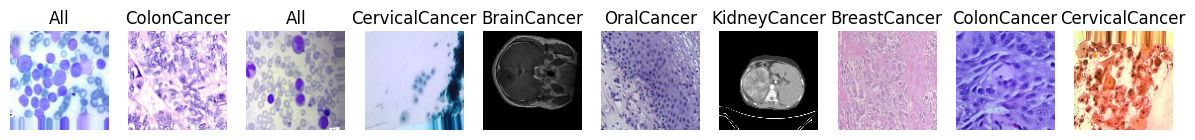

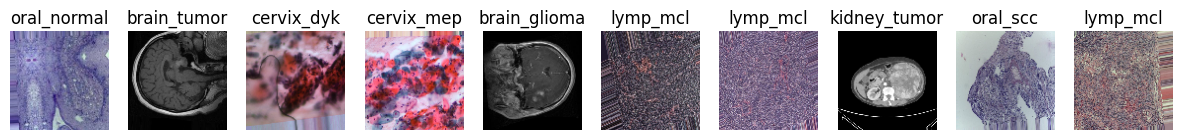

In [ ]:
import matplotlib.pyplot as plt

# Function to plot images from generator
def plot_images(generator, num_images=10):
    # Retrieve a batch of images and labels from the generator
    batch = next(generator)
    images = batch[0][:num_images]
    labels = batch[1][:num_images]

    # Get class labels
    if generator.class_mode == 'categorical':
        class_labels = {v:k for k, v in generator.class_indices.items()}
        labels = [class_labels[np.argmax(label)] for label in labels]

    # Plot images with labels
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

# Plot images from main class generator
plot_images(output_block1_train_generator_main)

# Plot images from sub class generator
plot_images(output_block1_train_generator_sub)


def create_data_generator(data, x_col, y_col, class_mode, batch_size):
    datagen = ImageDataGenerator(rescale=1.0 / 255.0)
    
    data_generator = datagen.flow_from_dataframe(
        dataframe=data,
        x_col=x_col,
        y_col=y_col,
        class_mode=class_mode,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=batch_size
    )
    
    return data_generator

output_block1_batch_size = 1024

# For sub class
output_block1_train_generator_sub = create_data_generator(
    output_block1_train, 'image_path', 'sub_class', 'categorical', output_block1_batch_size)
output_block1_val_generator_sub = create_data_generator(
    output_block1_val, 'image_path', 'sub_class', 'categorical', output_block1_batch_size)
output_block1_test_generator_sub = create_data_generator(
    output_block1_test, 'image_path', 'sub_class', 'categorical', output_block1_batch_size)

# For main class
output_block1_train_generator_main = create_data_generator(
    output_block1_train, 'image_path', 'main_class', 'categorical', output_block1_batch_size)
output_block1_val_generator_main = create_data_generator(
    output_block1_val, 'image_path', 'main_class', 'categorical', output_block1_batch_size)
output_block1_test_generator_main = create_data_generator(
    output_block1_test, 'image_path', 'main_class', 'categorical', output_block1_batch_size)


In [ ]:
import os
import pickle
from tensorflow.keras.models import load_model

model_files = {}

for filename in os.listdir('/content/model'):
  print(filename)



vgg_xception_best_model.h5
vgg_mobilenet_model_lstm_history_main.pkl
vgg_mobilenet_model_lstm_best_model_main.h5
vgg_xception_model_lstm_history_main.pkl
vgg_xception_model_lstm_best_model_main.h5
vgg_xception_model_lstm_history_sub.pkl
vgg_resnet_model_lstm_history_main.pkl
vgg_resnet_model_lstm_best_model_main.h5
vgg_resnet_model_lstm_best_model_sub.h5
vgg_inception_model_lstm_history_main.pkl
vgg_inception_model_lstm_best_model_main.h5
vgg_inception_model_lstm_best_model_sub.h5
vgg_inception_model_lstm_history_sub.pkl
mobilenet_inception_model_lstm_best_model_sub.h5
mobilenet_inception_model_lstm_best_model_main.h5
mobilenet_inception_model_lstm_history_main.pkl
mobilenet_inception_model_lstm_history_sub_.pkl
vgg_resnet_model_lstm_history_sub.pkl
vgg_mobilenet_model_lstm_history_sub_.pkl
vgg_mobilenet_model_lstm_best_model_sub.h5


In [ ]:
vgg_mobilenet_model_main=load_model('/content/drive/MyDrive/Multicancer/Model/model/vgg_mobilenet_model_lstm_best_model_main.h5')
vgg_xception_model_main=load_model('/content/drive/MyDrive/Multicancer/Model/model/vgg_xception_model_lstm_best_model_main.h5')
vgg_resnet_model_main=load_model('/content/drive/MyDrive/Multicancer/Model/model/vgg_resnet_model_lstm_best_model_main.h5')
vgg_inception_model_main=load_model('/content/drive/MyDrive/Multicancer/Model/model/vgg_inception_model_lstm_best_model_main.h5')
mobilenet_inception_model_main=load_model('/content/drive/MyDrive/Multicancer/Model/model/mobilenet_inception_model_lstm_best_model_main.h5')



vgg_mobilenet_model_sub=load_model('/content/drive/MyDrive/Multicancer/Model/model/vgg_mobilenet_model_lstm_best_model_sub.h5')
vgg_resnet_model_sub=load_model('/content/drive/MyDrive/Multicancer/Model/model/vgg_resnet_model_lstm_best_model_sub.h5')
vgg_inception_model_sub=load_model('/content/drive/MyDrive/Multicancer/Model/model/vgg_inception_model_lstm_best_model_sub.h5')
vgg_mobilenet_model_sub=load_model('/content/drive/MyDrive/Multicancer/Model/model/vgg_xception_best_model.h5')
mobilenet_inception_model_sub=load_model('/content/drive/MyDrive/Multicancer/Model/model/mobilenet_inception_model_lstm_best_model_sub.h5')







In [ ]:
vgg_mobilenet_model_main.evaluate(output_block1_test_generator_main)

13/13 [==============================] - 115s 6s/step - loss: 0.0096 - accuracy: 0.9971


[0.009599820710718632, 0.9970771670341492]

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Define your test generators
output_block1_test_generator_main = DataGenerator(output_block1_test, 'image_path', 'main_class', 'categorical', output_block1_batch_size).create_generator()

# Models to evaluate
models = [
    ('vgg_mobilenet_model_main', vgg_mobilenet_model_main),
    ('vgg_xception_model_main', vgg_xception_model_main),
    ('vgg_resnet_model_main', vgg_resnet_model_main),
    ('vgg_inception_model_main', vgg_inception_model_main),
    ('mobilenet_inception_model_main', mobilenet_inception_model_main)
]

for model_name, model in models:
    print(f"\nClassification Report for {model_name}:")
    y_true = output_block1_test_generator_main.classes
    y_pred_probs = model.predict(output_block1_test_generator_main)
    y_pred = np.argmax(y_pred_probs, axis=1)  # Get the class with the highest probability
    print(classification_report(y_true, y_pred, target_names=[f'class_{i}' for i in range(8)]))


In [ ]:
vgg_mobilenet_model_main_history=load_model('/content/drive/MyDrive/Multicancer/Model/model/vgg_mobilenet_model_lstm_best_model_main.h5')
vgg_xception_model_main=load_model('/content/drive/MyDrive/Multicancer/Model/model/vgg_xception_model_lstm_best_model_main.h5')
vgg_resnet_model_main=load_model('/content/drive/MyDrive/Multicancer/Model/model/vgg_resnet_model_lstm_best_model_main.h5')
vgg_inception_model_main=load_model('/content/drive/MyDrive/Multicancer/Model/model/vgg_inception_model_lstm_best_model_main.h5')
mobilenet_inception_model_main=load_model('/content/drive/MyDrive/Multicancer/Model/model/mobilenet_inception_model_lstm_best_model_main.h5')



vgg_mobilenet_model_sub=load_model('/content/drive/MyDrive/Multicancer/Model/model/vgg_mobilenet_model_lstm_best_model_sub.h5')
vgg_resnet_model_sub=load_model('/content/drive/MyDrive/Multicancer/Model/model/vgg_resnet_model_lstm_best_model_sub.h5')
vgg_inception_model_sub=load_model('/content/drive/MyDrive/Multicancer/Model/model/vgg_inception_model_lstm_best_model_sub.h5')
#vgg_mobilenet_model_sub=load_model('/content/drive/MyDrive/Multicancer/Model/model/vgg_xception_model_best_model.h5')
mobilenet_inception_model_sub=load_model('/content/drive/MyDrive/Multicancer/Model/model/mobilenet_inception_model_lstm_best_model_sub.h5')


In [ ]:
vgg_mobilenet_model_main.evaluate(output_block1_test_generator_main)

13/13 [==============================] - 1735s 132s/step - loss: 0.0103 - accuracy: 0.9969


[0.010321192443370819, 0.9969233274459839]

In [ ]:
import pickle

with open('/content/drive/MyDrive/Multicancer/Model/model/vgg_mobilenet_model_lstm_history_main.pkl', 'rb') as file:

  vgg_mobilenet_main_history = pickle.load(file)


with open('/content/drive/MyDrive/Multicancer/Model/model/vgg_xception_model_lstm_history_main.pkl', 'rb') as file:

  vgg_xception_main_history = pickle.load(file)

with open('/content/drive/MyDrive/Multicancer/Model/model/vgg_resnet_model_lstm_history_main.pkl', 'rb') as file:

  vgg_resnet_main_history = pickle.load(file)

with open('/content/drive/MyDrive/Multicancer/Model/model/vgg_inception_model_lstm_history_main.pkl', 'rb') as file:

  vgg_inception_main_history = pickle.load(file)

with open('/content/drive/MyDrive/Multicancer/Model/model/mobilenet_inception_model_lstm_history_main.pkl', 'rb') as file:

  mobilenet_inception_main_history = pickle.load(file)





with open('/content/drive/MyDrive/Multicancer/Model/model/vgg_mobilenet_model_lstm_history_sub_.pkl', 'rb') as file:

  vgg_mobilenet_sub_history = pickle.load(file)

with open('/content/drive/MyDrive/Multicancer/Model/model/vgg_xception_model_lstm_history_sub.pkl', 'rb') as file:

  vgg_xception_sub_history = pickle.load(file)

with open('/content/drive/MyDrive/Multicancer/Model/model/vgg_resnet_model_lstm_history_main.pkl', 'rb') as file:

  vgg_resnet_sub_history = pickle.load(file)

with open('/content/drive/MyDrive/Multicancer/Model/model/vgg_inception_model_lstm_history_sub.pkl', 'rb') as file:

  vgg_inception_sub_history = pickle.load(file)

with open('/content/drive/MyDrive/Multicancer/Model/model/mobilenet_inception_model_lstm_history_sub_.pkl', 'rb') as file:

  mobilenet_inception_sub_history = pickle.load(file)


In [ ]:
vgg_xception_main_history

{'loss': [0.2365732640028,
  0.031724713742733,
  0.021470606327056885,
  0.020141560584306717,
  0.01788194105029106,
  0.013677999377250671,
  0.01205969788134098,
  0.013384655117988586,
  0.012074022553861141,
  0.01139269582927227],
 'accuracy': [0.9251207709312439,
  0.990860104560852,
  0.9932800531387329,
  0.9935500621795654,
  0.994420051574707,
  0.9956700205802917,
  0.9959700107574463,
  0.9956300258636475,
  0.9962600469589233,
  0.9963000416755676],
 'val_loss': [0.026623783633112907,
  0.017672421410679817,
  0.01714499481022358,
  0.024436894804239273,
  0.015462196432054043,
  0.017775120213627815,
  0.02005220390856266,
  0.020326990634202957,
  0.017322884872555733,
  0.01845068857073784],
 'val_accuracy': [0.9912800192832947,
  0.9936000108718872,
  0.9950399994850159,
  0.991599977016449,
  0.9944000244140625,
  0.9945600032806396,
  0.9942399859428406,
  0.9937599897384644,
  0.9947999715805054,
  0.9946399927139282],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.

In [ ]:
plt.plot(vgg_mobilenet_main_history['accuracy'], label='VGG-MobileNet Main', linestyle='-', color='b')

In [ ]:
# Plot main accuracy
plt.figure(figsize=(10, 5))
plt.plot(vgg_mobilenet_main_history['accuracy'], label='VGG-MobileNet Main', linestyle='-', color='b')
plt.plot(vgg_xception_main_history['accuracy'], label='VGG-Xception Main', linestyle='-', color='r')
#plt.plot(vgg_resnet_main_history['accuracy'], label='VGG-ResNet Main', linestyle='-', color='g')
plt.plot(vgg_inception_main_history['accuracy'], label='VGG-Inception Main', linestyle='-', color='m')
plt.plot(mobilenet_inception_main_history['accuracy'], label='MobileNet-Inception Main', linestyle='-', color='c')
plt.title('Main Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Find the epoch with maximum accuracy for each model
vgg_mobilenet_max_acc_epoch = np.argmax(vgg_mobilenet_main_history['accuracy']) + 1
vgg_xception_max_acc_epoch = np.argmax(vgg_xception_main_history['accuracy']) + 1
vgg_inception_max_acc_epoch = np.argmax(vgg_inception_main_history['accuracy']) + 1
mobilenet_inception_max_acc_epoch = np.argmax(mobilenet_inception_main_history['accuracy']) + 1

# Plot main accuracy
plt.figure(figsize=(10, 5))
plt.plot(vgg_mobilenet_main_history['accuracy'], label='VGG-MobileNet Main', linestyle='-', color='b')
plt.plot(vgg_xception_main_history['accuracy'], label='VGG-Xception Main', linestyle='-', color='r')
plt.plot(vgg_inception_main_history['accuracy'], label='VGG-Inception Main', linestyle='-', color='m')
plt.plot(mobilenet_inception_main_history['accuracy'], label='MobileNet-Inception Main', linestyle='-', color='c')

# Scatter plot for maximum accuracy points
plt.scatter(vgg_mobilenet_max_acc_epoch, max(vgg_mobilenet_main_history['accuracy']), color='b', marker='o', s=100, label='Max VGG-MobileNet')
plt.scatter(vgg_xception_max_acc_epoch, max(vgg_xception_main_history['accuracy']), color='r', marker='o', s=100, label='Max VGG-Xception')
plt.scatter(vgg_inception_max_acc_epoch, max(vgg_inception_main_history['accuracy']), color='m', marker='o', s=100, label='Max VGG-Inception')
plt.scatter(mobilenet_inception_max_acc_epoch, max(mobilenet_inception_main_history['accuracy']), color='c', marker='o', s=100, label='Max MobileNet-Inception')

plt.title('Main Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


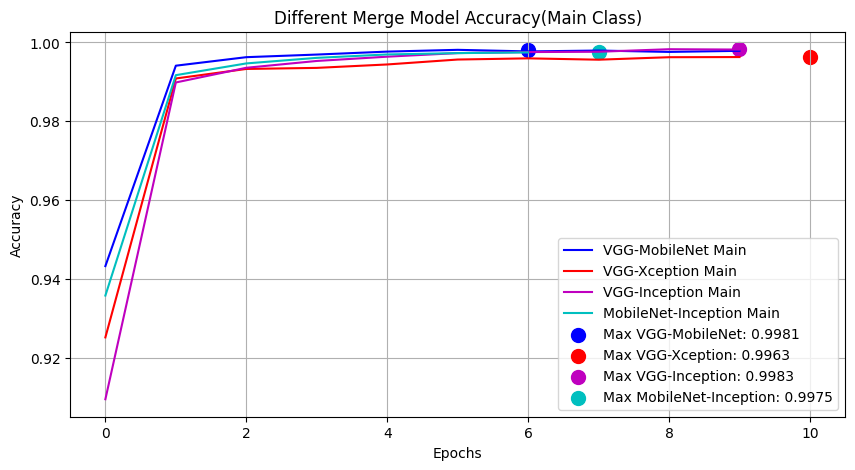

In [ ]:
# Find the epoch with maximum accuracy for each model
vgg_mobilenet_max_acc_epoch = np.argmax(vgg_mobilenet_main_history['accuracy']) + 1
vgg_mobilenet_max_acc_value = max(vgg_mobilenet_main_history['accuracy'])

vgg_xception_max_acc_epoch = np.argmax(vgg_xception_main_history['accuracy']) + 1
vgg_xception_max_acc_value = max(vgg_xception_main_history['accuracy'])

vgg_inception_max_acc_epoch = np.argmax(vgg_inception_main_history['accuracy']) + 1
vgg_inception_max_acc_value = max(vgg_inception_main_history['accuracy'])

mobilenet_inception_max_acc_epoch = np.argmax(mobilenet_inception_main_history['accuracy']) + 1
mobilenet_inception_max_acc_value = max(mobilenet_inception_main_history['accuracy'])

# Plot main accuracy
plt.figure(figsize=(10, 5))
plt.plot(vgg_mobilenet_main_history['accuracy'], label='VGG-MobileNet Main', linestyle='-', color='b')
plt.plot(vgg_xception_main_history['accuracy'], label='VGG-Xception Main', linestyle='-', color='r')
plt.plot(vgg_inception_main_history['accuracy'], label='VGG-Inception Main', linestyle='-', color='m')
plt.plot(mobilenet_inception_main_history['accuracy'], label='MobileNet-Inception Main', linestyle='-', color='c')

# Scatter plot for maximum accuracy points
plt.scatter(vgg_mobilenet_max_acc_epoch, vgg_mobilenet_max_acc_value, color='b', marker='o', s=100, label=f'Max VGG-MobileNet: {vgg_mobilenet_max_acc_value:.4f}')
plt.scatter(vgg_xception_max_acc_epoch, vgg_xception_max_acc_value, color='r', marker='o', s=100, label=f'Max VGG-Xception: {vgg_xception_max_acc_value:.4f}')
plt.scatter(vgg_inception_max_acc_epoch, vgg_inception_max_acc_value, color='m', marker='o', s=100, label=f'Max VGG-Inception: {vgg_inception_max_acc_value:.4f}')
plt.scatter(mobilenet_inception_max_acc_epoch, mobilenet_inception_max_acc_value, color='c', marker='o', s=100, label=f'Max MobileNet-Inception: {mobilenet_inception_max_acc_value:.4f}')

plt.title('Different Merge Model Accuracy(Main Class)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('Different Merge Model Accuracy(Main Class)')
plt.show()


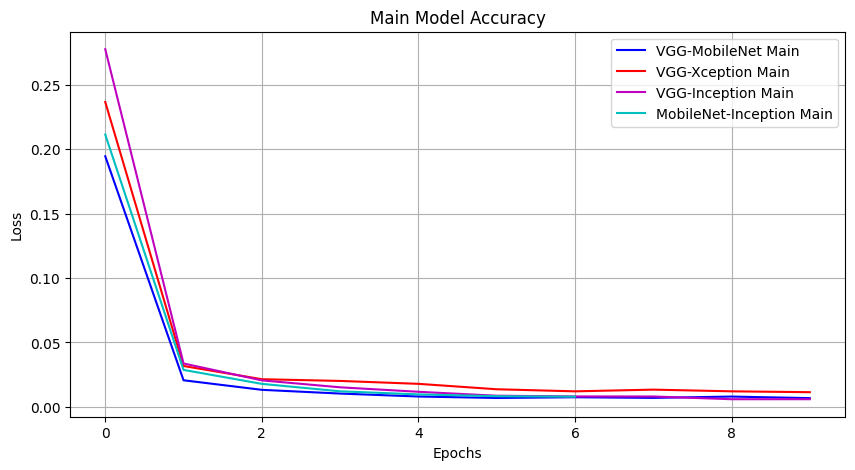

In [ ]:
# Plot main accuracy
plt.figure(figsize=(10, 5))
plt.plot(vgg_mobilenet_main_history['loss'], label='VGG-MobileNet Main', linestyle='-', color='b')
plt.plot(vgg_xception_main_history['loss'], label='VGG-Xception Main', linestyle='-', color='r')
#plt.plot(vgg_resnet_main_history['accuracy'], label='VGG-ResNet Main', linestyle='-', color='g')
plt.plot(vgg_inception_main_history['loss'], label='VGG-Inception Main', linestyle='-', color='m')
plt.plot(mobilenet_inception_main_history['loss'], label='MobileNet-Inception Main', linestyle='-', color='c')
plt.title('Main Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

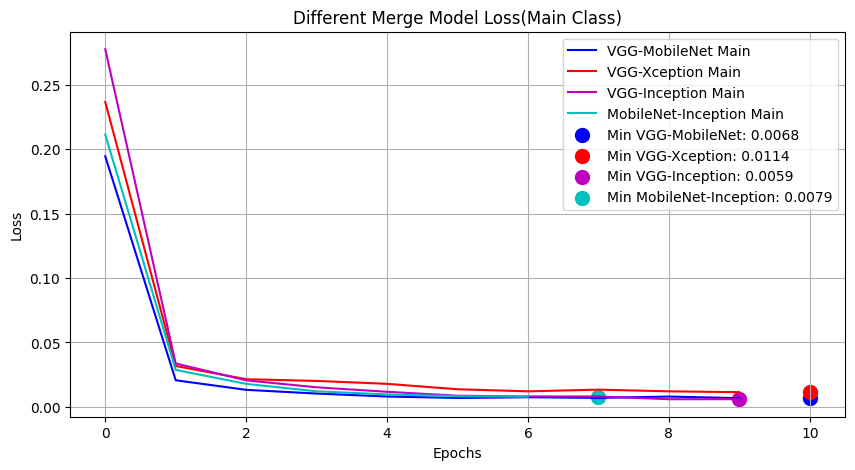

In [ ]:
# Find the epoch with maximum accuracy for each model
vgg_mobilenet_max_acc_epoch = np.argmin(vgg_mobilenet_main_history['loss']) + 1
vgg_mobilenet_max_acc_value = min(vgg_mobilenet_main_history['loss'])

vgg_xception_max_acc_epoch = np.argmin(vgg_xception_main_history['loss']) + 1
vgg_xception_max_acc_value = min(vgg_xception_main_history['loss'])

vgg_inception_max_acc_epoch = np.argmin(vgg_inception_main_history['loss']) + 1
vgg_inception_max_acc_value = min(vgg_inception_main_history['loss'])

mobilenet_inception_max_acc_epoch = np.argmin(mobilenet_inception_main_history['loss']) + 1
mobilenet_inception_max_acc_value = min(mobilenet_inception_main_history['loss'])

# Plot main accuracy
plt.figure(figsize=(10, 5))
plt.plot(vgg_mobilenet_main_history['loss'], label='VGG-MobileNet Main', linestyle='-', color='b')
plt.plot(vgg_xception_main_history['loss'], label='VGG-Xception Main', linestyle='-', color='r')
plt.plot(vgg_inception_main_history['loss'], label='VGG-Inception Main', linestyle='-', color='m')
plt.plot(mobilenet_inception_main_history['loss'], label='MobileNet-Inception Main', linestyle='-', color='c')

# Scatter plot for maximum accuracy points
plt.scatter(vgg_mobilenet_max_acc_epoch, vgg_mobilenet_max_acc_value, color='b', marker='o', s=100, label=f'Min VGG-MobileNet: {vgg_mobilenet_max_acc_value:.4f}')
plt.scatter(vgg_xception_max_acc_epoch, vgg_xception_max_acc_value, color='r', marker='o', s=100, label=f'Min VGG-Xception: {vgg_xception_max_acc_value:.4f}')
plt.scatter(vgg_inception_max_acc_epoch, vgg_inception_max_acc_value, color='m', marker='o', s=100, label=f'Min VGG-Inception: {vgg_inception_max_acc_value:.4f}')
plt.scatter(mobilenet_inception_max_acc_epoch, mobilenet_inception_max_acc_value, color='c', marker='o', s=100, label=f'Min MobileNet-Inception: {mobilenet_inception_max_acc_value:.4f}')

plt.title('Different Merge Model Loss(Main Class)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('Different Merge Model Loss(Main Class)')
plt.show()

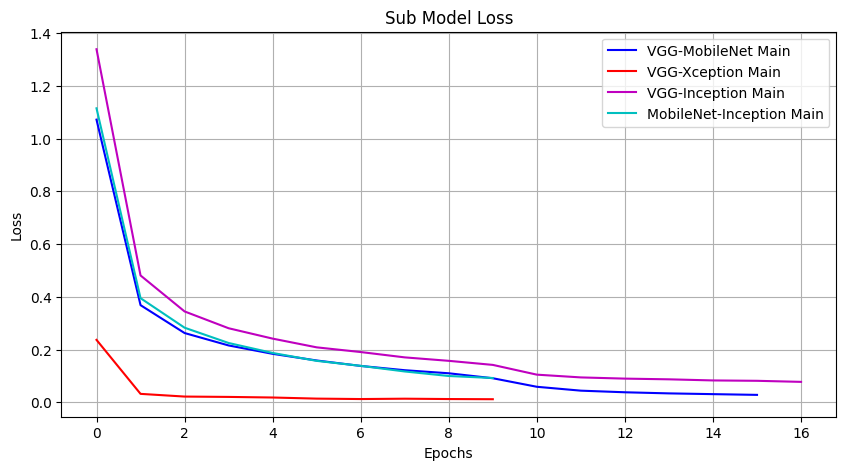

In [ ]:
# Plot main accuracy
plt.figure(figsize=(10, 5))
plt.plot(vgg_mobilenet_sub_history['loss'], label='VGG-MobileNet Main', linestyle='-', color='b')
plt.plot(vgg_xception_sub_history['loss'], label='VGG-Xception Main', linestyle='-', color='r')
#plt.plot(vgg_resnet_main_history['accuracy'], label='VGG-ResNet Main', linestyle='-', color='g')
plt.plot(vgg_inception_sub_history['loss'], label='VGG-Inception Main', linestyle='-', color='m')
plt.plot(mobilenet_inception_sub_history['loss'], label='MobileNet-Inception Main', linestyle='-', color='c')
plt.title('Sub Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

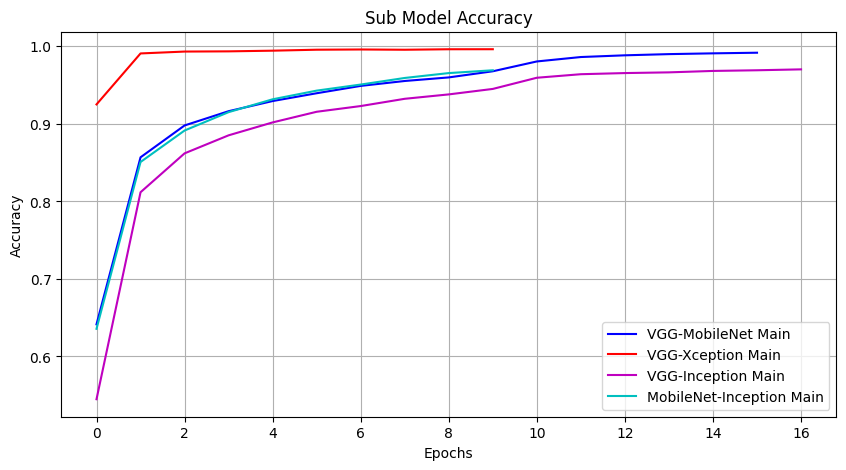

In [ ]:
# Plot main accuracy
plt.figure(figsize=(10, 5))
plt.plot(vgg_mobilenet_sub_history['accuracy'], label='VGG-MobileNet Main', linestyle='-', color='b')
plt.plot(vgg_xception_sub_history['accuracy'], label='VGG-Xception Main', linestyle='-', color='r')
#plt.plot(vgg_resnet_main_history['accuracy'], label='VGG-ResNet Main', linestyle='-', color='g')
plt.plot(vgg_inception_sub_history['accuracy'], label='VGG-Inception Main', linestyle='-', color='m')
plt.plot(mobilenet_inception_sub_history['accuracy'], label='MobileNet-Inception Main', linestyle='-', color='c')
plt.title('Sub Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

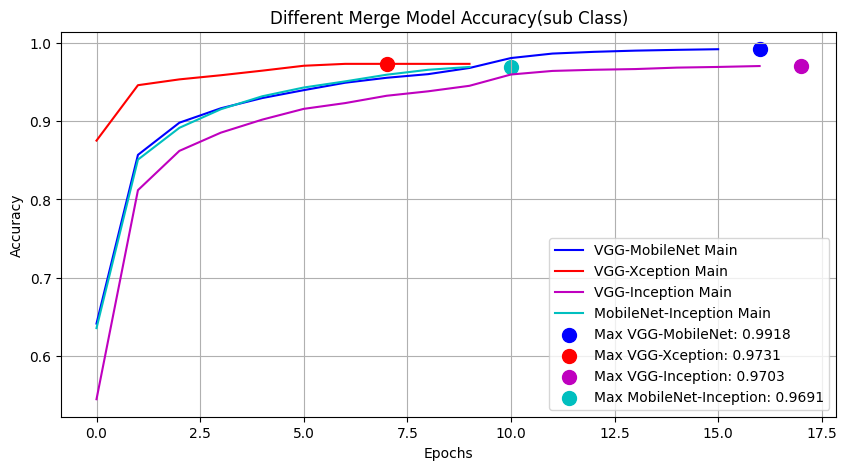

In [ ]:
# Find the epoch with maximum accuracy for each model
vgg_mobilenet_max_acc_epoch = np.argmax(vgg_mobilenet_sub_history['accuracy']) + 1
vgg_mobilenet_max_acc_value = max(vgg_mobilenet_sub_history['accuracy'])

vgg_xception_max_acc_epoch = np.argmax(vgg_xception_sub_history['accuracy']) + 1
vgg_xception_max_acc_value = max(vgg_xception_sub_history['accuracy'])

vgg_inception_max_acc_epoch = np.argmax(vgg_inception_sub_history['accuracy']) + 1
vgg_inception_max_acc_value = max(vgg_inception_sub_history['accuracy'])

mobilenet_inception_max_acc_epoch = np.argmax(mobilenet_inception_sub_history['accuracy']) + 1
mobilenet_inception_max_acc_value = max(mobilenet_inception_sub_history['accuracy'])

# Plot main accuracy
plt.figure(figsize=(10, 5))
plt.plot(vgg_mobilenet_sub_history['accuracy'], label='VGG-MobileNet Main', linestyle='-', color='b')
plt.plot(vgg_xception_sub_history['accuracy'], label='VGG-Xception Main', linestyle='-', color='r')
plt.plot(vgg_inception_sub_history['accuracy'], label='VGG-Inception Main', linestyle='-', color='m')
plt.plot(mobilenet_inception_sub_history['accuracy'], label='MobileNet-Inception Main', linestyle='-', color='c')

# Scatter plot for maximum accuracy points
plt.scatter(vgg_mobilenet_max_acc_epoch, vgg_mobilenet_max_acc_value, color='b', marker='o', s=100, label=f'Max VGG-MobileNet: {vgg_mobilenet_max_acc_value:.4f}')
plt.scatter(vgg_xception_max_acc_epoch, vgg_xception_max_acc_value, color='r', marker='o', s=100, label=f'Max VGG-Xception: {vgg_xception_max_acc_value:.4f}')
plt.scatter(vgg_inception_max_acc_epoch, vgg_inception_max_acc_value, color='m', marker='o', s=100, label=f'Max VGG-Inception: {vgg_inception_max_acc_value:.4f}')
plt.scatter(mobilenet_inception_max_acc_epoch, mobilenet_inception_max_acc_value, color='c', marker='o', s=100, label=f'Max MobileNet-Inception: {mobilenet_inception_max_acc_value:.4f}')

plt.title('Different Merge Model Accuracy(sub Class)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('Different Merge Model Accuracy(sub Class)')
plt.show()


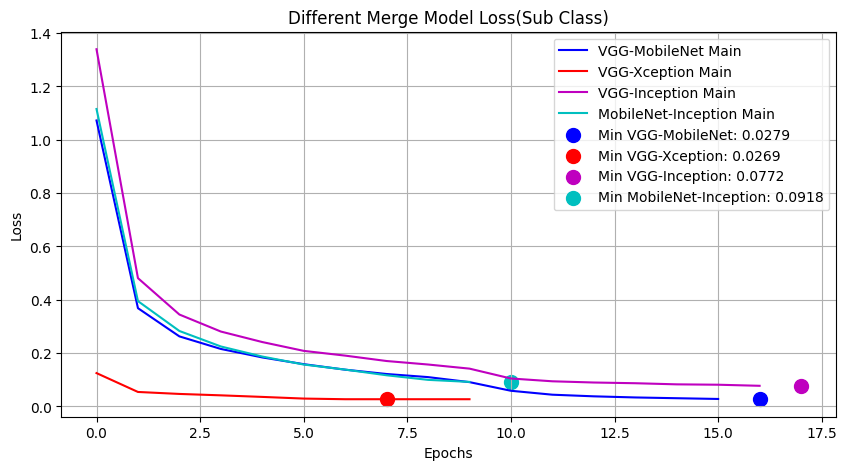

In [ ]:
# Find the epoch with maximum accuracy for each model
vgg_mobilenet_max_acc_epoch = np.argmin(vgg_mobilenet_sub_history['loss']) + 1
vgg_mobilenet_max_acc_value = min(vgg_mobilenet_sub_history['loss'])

vgg_xception_max_acc_epoch = np.argmin(vgg_xception_sub_history['loss']) + 1
vgg_xception_max_acc_value = min(vgg_xception_sub_history['loss'])

vgg_inception_max_acc_epoch = np.argmin(vgg_inception_sub_history['loss']) + 1
vgg_inception_max_acc_value = min(vgg_inception_sub_history['loss'])

mobilenet_inception_max_acc_epoch = np.argmin(mobilenet_inception_sub_history['loss']) + 1
mobilenet_inception_max_acc_value = min(mobilenet_inception_sub_history['loss'])

# Plot main accuracy
plt.figure(figsize=(10, 5))
plt.plot(vgg_mobilenet_sub_history['loss'], label='VGG-MobileNet Main', linestyle='-', color='b')
plt.plot(vgg_xception_sub_history['loss'], label='VGG-Xception Main', linestyle='-', color='r')
plt.plot(vgg_inception_sub_history['loss'], label='VGG-Inception Main', linestyle='-', color='m')
plt.plot(mobilenet_inception_sub_history['loss'], label='MobileNet-Inception Main', linestyle='-', color='c')

# Scatter plot for maximum accuracy points
plt.scatter(vgg_mobilenet_max_acc_epoch, vgg_mobilenet_max_acc_value, color='b', marker='o', s=100, label=f'Min VGG-MobileNet: {vgg_mobilenet_max_acc_value:.4f}')
plt.scatter(vgg_xception_max_acc_epoch, vgg_xception_max_acc_value, color='r', marker='o', s=100, label=f'Min VGG-Xception: {vgg_xception_max_acc_value:.4f}')
plt.scatter(vgg_inception_max_acc_epoch, vgg_inception_max_acc_value, color='m', marker='o', s=100, label=f'Min VGG-Inception: {vgg_inception_max_acc_value:.4f}')
plt.scatter(mobilenet_inception_max_acc_epoch, mobilenet_inception_max_acc_value, color='c', marker='o', s=100, label=f'Min MobileNet-Inception: {mobilenet_inception_max_acc_value:.4f}')

plt.title('Different Merge Model Loss(Sub Class)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('Different Merge Model Loss(Sub Class)')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

# Load the model
vgg_inception_model_main = load_model('/content/drive/MyDrive/Multicancer/Model/model/vgg_mobilenet_model_lstm_best_model_main.h5')

# Function to evaluate model and create confusion matrix
def evaluate_model(model, generator):
    # Predict classes
    y_pred = model.predict(generator)

    # Convert predictions to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Get true labels
    y_true = generator.classes

    # Create confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred_classes)

    # Display classification report
    print("Classification Report:\n", classification_report(y_true, y_pred_classes))

    # Plot confusion matrix
    class_labels = list(generator.class_indices.keys())
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Test the model
output_block1_test_generator_main = DataGenerator(output_block1_test, 'image_path', 'main_class', 'categorical', output_block1_batch_size).create_generator()

# Evaluate the model and create confusion matrix
evaluate_model(vgg_inception_model_main, output_block1_test_generator_main)


Found 13001 validated image filenames belonging to 8 classes.
